In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/medical_insurance_cost.csv")
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
df.shape

(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
(df == 0).sum()

age           0
sex           0
bmi           0
children    574
smoker        0
region        0
charges       0
dtype: int64

In [5]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Categorical Variables

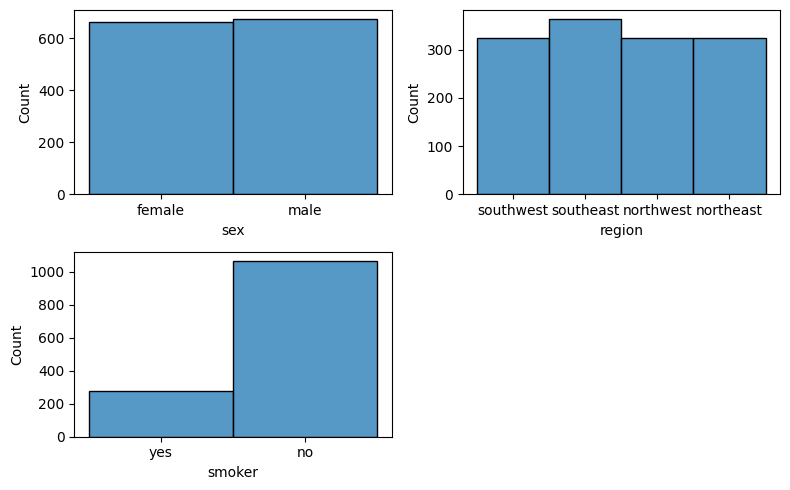

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis on Categorical Variables
fig, axis = plt.subplots(2,2, figsize=(8, 5))

sns.histplot(ax=axis[0,0], data=df, x="sex")
sns.histplot(ax=axis[0,1], data=df, x="region")
sns.histplot(ax=axis[1,0], data=df, x="smoker")

plt.delaxes(axis[1,1])

plt.tight_layout()
plt.show()


### Numerical Variables

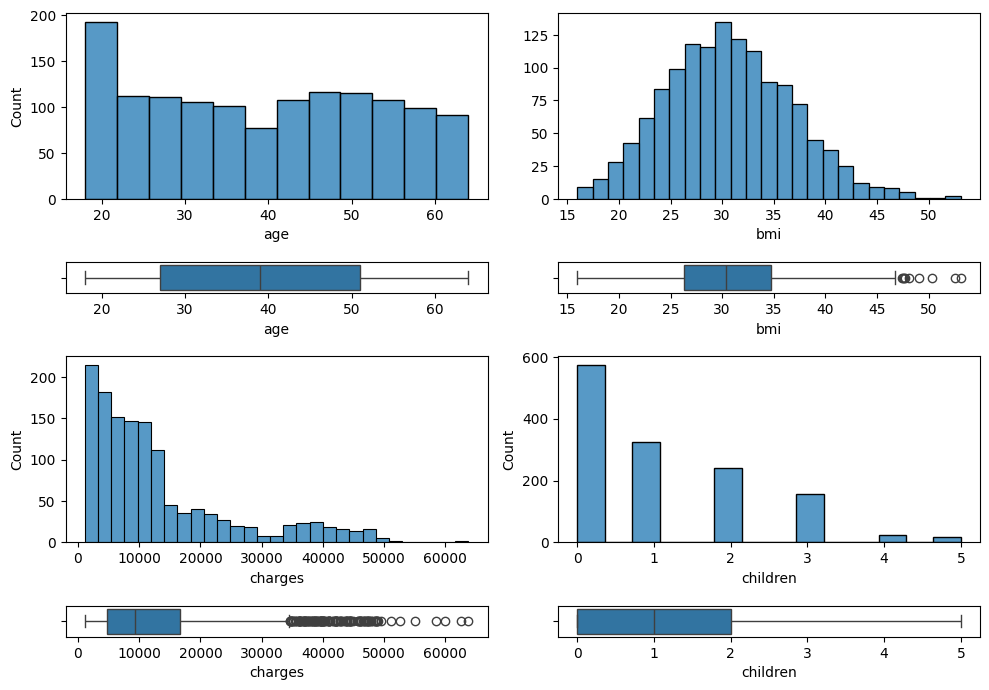

In [7]:
df.describe()# Analysis on Numerical Variables
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={"height_ratios": [6,1,6,1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(ylabel=None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")

sns.histplot(ax = axis[2, 0], data = df, x = "charges")
sns.boxplot(ax = axis[3, 0], data = df, x = "charges")

sns.histplot(ax = axis[2, 1], data = df, x = "children")
sns.boxplot(ax = axis[3, 1], data = df, x = "children")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Analysis for Numerical vs Numerical

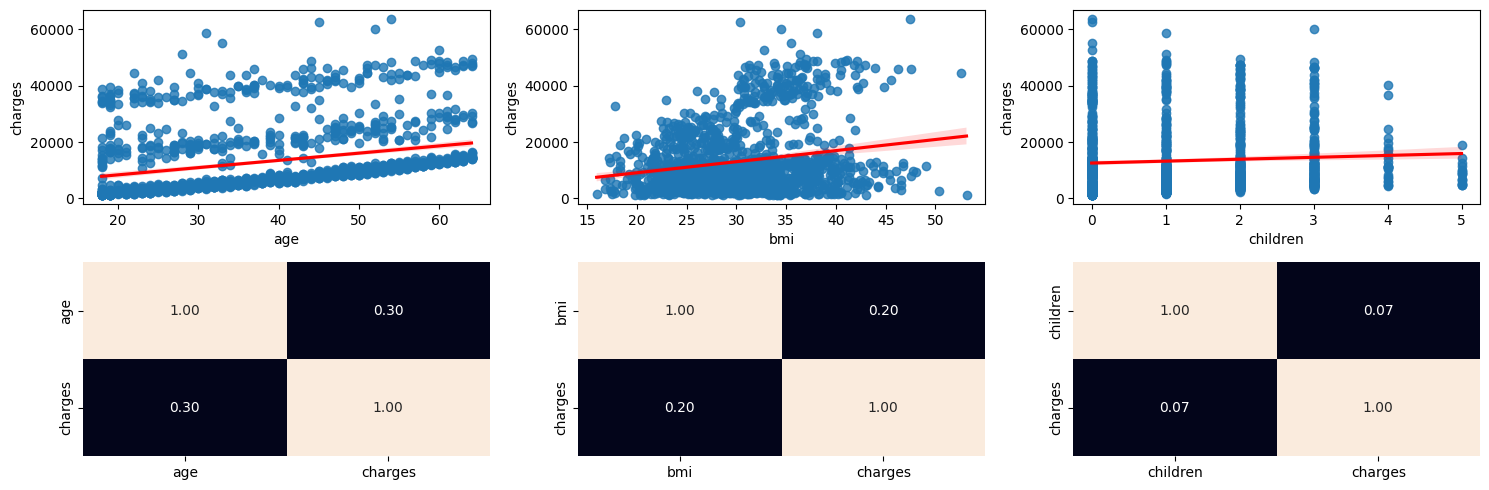

In [8]:
fig, axis = plt.subplots(2, 3, figsize=(15,5))

sns.regplot(ax=axis[0,0], data=df, x="age", y="charges", marker='o', line_kws={'color':'red'})
sns.heatmap(df[['age', 'charges']].corr(), annot=True, fmt=".2f", ax=axis[1,0], cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="bmi", y="charges", marker='o', line_kws={'color':'red'})
sns.heatmap(df[['bmi', 'charges']].corr(), annot=True, fmt=".2f", ax=axis[1,1], cbar=False)

sns.regplot(ax=axis[0,2], data=df, x="children", y="charges", marker='o', line_kws={'color':'red'})
sns.heatmap(df[['children', 'charges']].corr(), annot=True, fmt=".2f", ax=axis[1,2], cbar=False)

plt.tight_layout()
plt.show()


### Analysis for Categorical vs Categorical

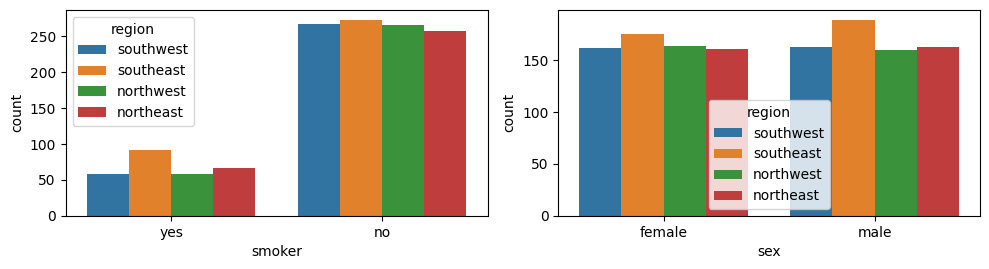

In [9]:
fig, axis = plt.subplots(2,2, figsize=(10,5))
sns.countplot(ax=axis[0,0], data=df, x="smoker", hue="region")
sns.countplot(ax=axis[0,1], data=df, x="sex", hue="region")
fig.delaxes(axis[1,0])
fig.delaxes(axis[1,1])
plt.tight_layout()
plt.show()

### MinMaxScaler

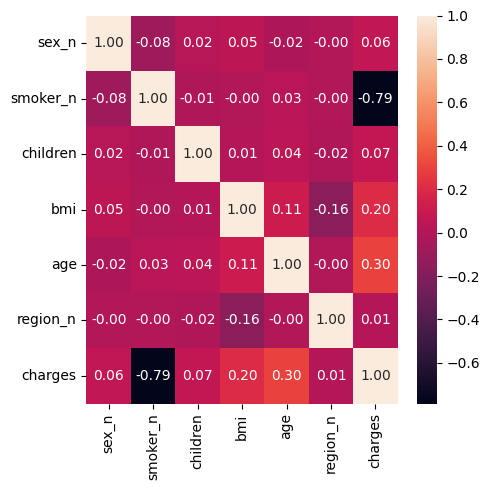

In [10]:
# MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

#Factorize Categorical 
df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]
variables = ['age', 'sex_n','bmi', 'children', 'smoker_n', 'region_n', 'charges']


fig, axis = plt.subplots(figsize=(5,5))

sns.heatmap(df[['sex_n','smoker_n','children','bmi','age','region_n','charges']].corr(), annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

In [11]:
# Scale
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[variables])
df_scal = pd.DataFrame(scal_features, index=df.index, columns=variables)
df_scal.head()

,age,sex_n,bmi,children,smoker_n,region_n,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,0.043816


### Feature selection

In [12]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = df_scal.drop("charges", axis = 1)
y = df_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()


,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [13]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values

X_train_sel.to_csv("data/clean_train.csv", index = False)
X_test_sel.to_csv("data/clean_test.csv", index = False)

### Linear Regression Model

In [14]:
train_data = pd.read_csv("data/clean_train.csv")
test_data = pd.read_csv("data/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


In [15]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

X_train.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


### Linear Model

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3195827183308946
Coefficients (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [18]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.009150574110332004
R2 Score: 0.8045531086669286


### Optimized Models

### Lasso Model

In [20]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

lasso_model.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
score = lasso_model.score(X_test, y_test)
print("MSE:", mse)
print("R2 score:", score)

MSE: 0.009150574110332004
R2 score: -0.008391982350864469


### Ridge Model

In [21]:
from sklearn.linear_model import Ridge
import math

ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
score = ridge_model.score(X_test, y_test)
print("MSE:", mse)
print("R2 score:", score)

MSE: 0.009157657439474061
R2 score: 0.8044018160109256


In [22]:
from pickle import dump

dump(model, open("model/linear_regression_charges_predictor.sav", "wb"))